In [1]:
import re
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_log(name):
    log = {}
    for file_name in os.listdir('../logs/'):
        if (m := re.match(rf'lsai-{name}-(\d+)\.out', file_name)):
            log['job_id'] = int(m.group(1))
            path = os.path.join('../logs/', file_name)
            break
    else:
        raise FileNotFoundError(f'Log file for {name} not found.')
    with open(path, 'r') as fp:
        is_first = True
        for line in fp.readlines():
            if ' - INFO - Starting training!' in line and 'training_start' not in log:
                log['training_start'] = datetime.datetime.fromisoformat(line.split(' - ')[0])
            if ' - INFO - Training completed' in line:
                log['training_complete'] = datetime.datetime.fromisoformat(line.split(' - ')[0])
            if '- INFO - Step: ' in line:
                for item in line.split(' - ')[-1].split(' | '):
                    try:
                        if (m := re.match(rf'Reserved Memory ([\d\.]*) GB', item)):
                            k = 'Reserved Memory GB'
                            v = float(m.group(1))
                        else:
                            k, v = item.split(': ')
                        if k not in log:
                            assert is_first
                            log[k] = []
                        log[k].append(float(v))
                    except ValueError:
                        pass
                is_first = False
    return log

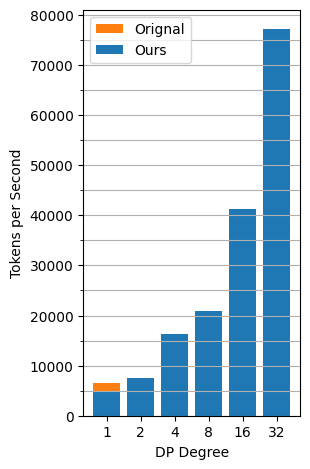

In [3]:
# DP Tokens per Second
plt.figure(figsize=(3.2,4.8))
dps = [1, 2, 4, 8, 16, 32]
thrps = []
for dp in dps:
    log = read_log(f'dp{dp}' if dp != 1 else 'base')
    thrps.append(np.mean(log['Tokens per second'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['Tokens per second'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(dps)), thrps, label='Ours')
plt.xticks(np.arange(len(dps)), list(map(str, dps)))
plt.yticks(np.arange(0, max(thrps)+5000, 5000), minor=True)
plt.xlabel('DP Degree')
plt.ylabel('Tokens per Second')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tokens_per_sec_dp.pdf')
plt.show()

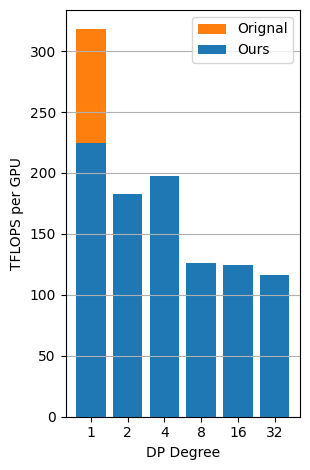

In [4]:
# DP TFLOPS
plt.figure(figsize=(3.2,4.8))
dps = [1, 2, 4, 8, 16, 32]
thrps = []
for dp in dps:
    log = read_log(f'dp{dp}' if dp != 1 else 'base')
    thrps.append(np.mean(log['TFLOP/s/GPU'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['TFLOPs'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(dps)), thrps, label='Ours')
plt.xticks(np.arange(len(dps)), list(map(str, dps)))
# plt.yticks(np.arange(0, max(thrps)+5000, 5000), minor=True)
plt.xlabel('DP Degree')
plt.ylabel('TFLOPS per GPU')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tflops_dp.pdf')
plt.show()

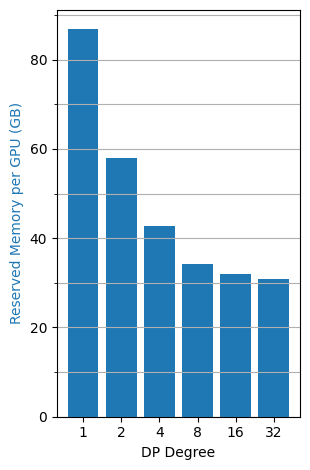

In [5]:
# DP Memory
plt.figure(figsize=(3.2,4.8))
dps = [1, 2, 4, 8, 16, 32]
thrps = []
for dp in dps:
    log = read_log(f'dp{dp}' if dp != 1 else 'base')
    thrps.append(np.mean(log['Reserved Memory GB'][10:]))
log_base_orig = read_log('base-orig')
plt.bar(np.arange(len(dps)), thrps, label='Ours')
plt.xticks(np.arange(len(dps)), list(map(str, dps)))
plt.yticks(list(range(0, 100, 10)), minor=True)
plt.xlabel('DP Degree')
plt.ylabel('Reserved Memory per GPU (GB)', color='tab:blue')
plt.grid(which='both', axis='y')
# plt.legend()
# plt.ylim(0, 95)

# ax2 = plt.twinx()
# ax2.plot(np.arange(len(dps)), [1, 2, 4, 8, 16, 16], 'X-', color='tab:orange')
# ax2.set_ylim(0, 19)
# ax2.set_yticks([1, 2, 4, 8, 16])
# ax2.set_ylabel('Batch Size', color='tab:orange')

plt.tight_layout()
plt.savefig('memory_dp.pdf')
plt.show()

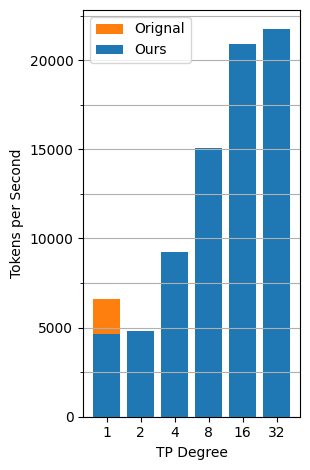

In [6]:
# TP Tokens per Second
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}' if tp != 1 else 'base')
    thrps.append(np.mean(log['Tokens per second'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['Tokens per second'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, max(thrps)+2500, 2500), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Tokens per Second')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tokens_per_sec_tp.pdf')
plt.show()

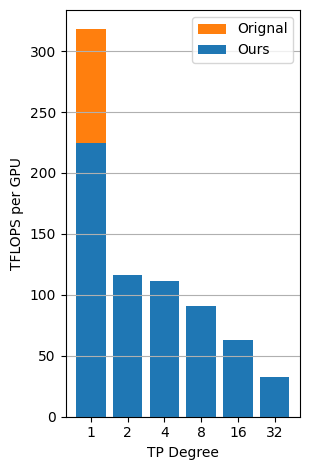

In [7]:
# TP TFLOPS
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}' if tp != 1 else 'base')
    thrps.append(np.mean(log['TFLOP/s/GPU'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['TFLOPs'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
# plt.yticks(np.arange(0, 350, 25), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('TFLOPS per GPU')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tflops_tp.pdf')
plt.show()

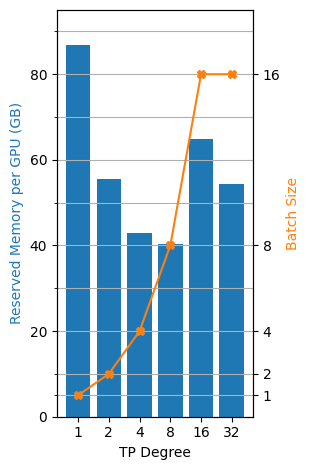

In [8]:
# TP Memory
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}' if tp != 1 else 'base')
    thrps.append(np.mean(log['Reserved Memory GB'][10:]))
log_base_orig = read_log('base-orig')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(list(range(0, 100, 10)) + [5], minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Reserved Memory per GPU (GB)', color='tab:blue')
plt.grid(which='both', axis='y')
# plt.legend()
plt.ylim(0, 95)

ax2 = plt.twinx()
ax2.plot(np.arange(len(tps)), [1, 2, 4, 8, 16, 16], 'X-', color='tab:orange')
ax2.set_ylim(0, 19)
ax2.set_yticks([1, 2, 4, 8, 16])
ax2.set_ylabel('Batch Size', color='tab:orange')

plt.tight_layout()
plt.savefig('memory_tp.pdf')
plt.show()

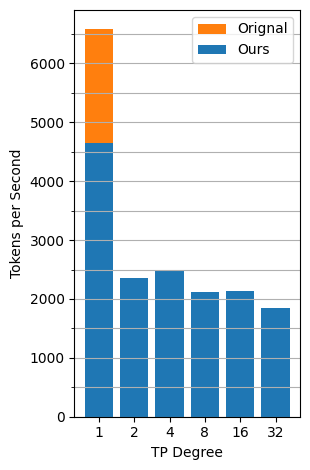

In [9]:
# TP bs=1 Tokens per Second
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}-bs1' if tp != 1 else 'base')
    thrps.append(np.mean(log['Tokens per second'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['Tokens per second'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, 7000, 500), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Tokens per Second')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tokens_per_sec_tp_bs1.pdf')
plt.show()

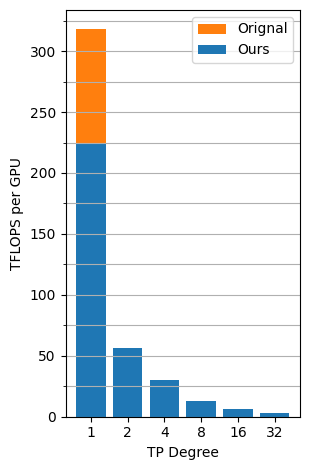

In [10]:
# TP bs=1 TFLOPS
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}-bs1' if tp != 1 else 'base')
    thrps.append(np.mean(log['TFLOP/s/GPU'][10:]))
log_base_orig = read_log('base-orig')
plt.bar([0], [np.mean(log_base_orig['TFLOPs'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, 350, 25), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('TFLOPS per GPU')
plt.grid(which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('tflops_tp_bs1.pdf')
plt.show()

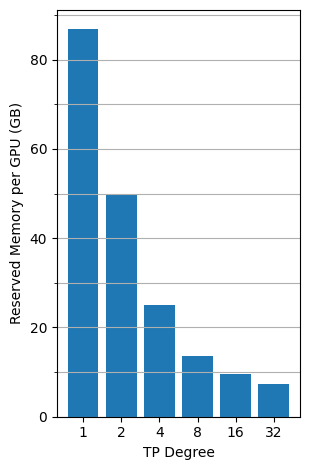

In [11]:
# TP bs=1 Memory
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8, 16, 32]
thrps = []
for tp in tps:
    log = read_log(f'tp{tp}-bs1' if tp != 1 else 'base')
    thrps.append(np.mean(log['Reserved Memory GB'][10:]))
log_base_orig = read_log('base-orig')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, 100, 10), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Reserved Memory per GPU (GB)')
plt.grid(which='both', axis='y')
# plt.legend()
plt.tight_layout()
plt.savefig('memory_tp_bs1.pdf')
plt.show()

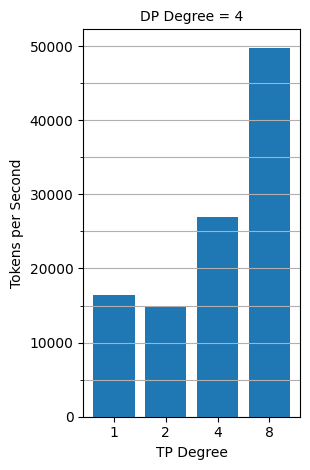

In [12]:
# DP=4 TP Tokens per Second
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8]
thrps = []
for tp in tps:
    log = read_log(f'dp4-tp{tp}' if tp != 1 else 'dp4')
    thrps.append(np.mean(log['Tokens per second'][10:]))
# log_base_orig = read_log('base-orig')
# plt.bar([0], [np.mean(log_base_orig['Tokens per second'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, max(thrps)+5000, 5000), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Tokens per Second')
plt.grid(which='both', axis='y')
# plt.legend()
plt.title('DP Degree = 4', fontsize=None)
plt.tight_layout()
plt.savefig('tokens_per_sec_dp4_tp.pdf')
plt.show()

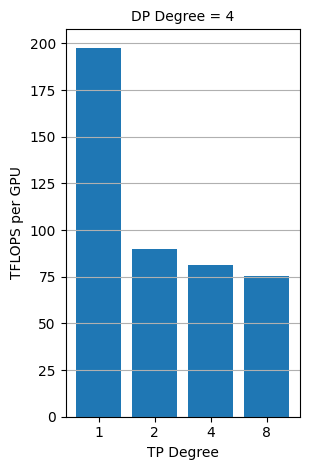

In [13]:
# DP=4 TP TFLOPS
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8]
thrps = []
for tp in tps:
    log = read_log(f'dp4-tp{tp}' if tp != 1 else 'dp4')
    thrps.append(np.mean(log['TFLOP/s/GPU'][10:]))
# log_base_orig = read_log('base-orig')
# plt.bar([0], [np.mean(log_base_orig['TFLOPs'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
# plt.yticks(np.arange(0, 350, 25), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('TFLOPS per GPU')
plt.grid(which='both', axis='y')
# plt.legend()
plt.title('DP Degree = 4', fontsize=None)
plt.tight_layout()
plt.savefig('tflops_dp4_tp.pdf')
plt.show()

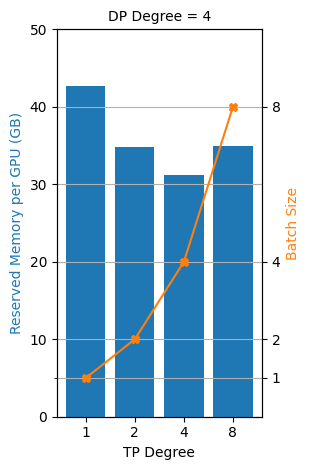

In [14]:
# DP=4 TP Memory
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4, 8]
thrps = []
for tp in tps:
    log = read_log(f'dp4-tp{tp}' if tp != 1 else 'dp4')
    thrps.append(np.mean(log['Reserved Memory GB'][10:]))
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.ylim(0, 50)
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(list(range(0, 50, 10)) + [5], minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Reserved Memory per GPU (GB)', color='tab:blue')
plt.grid(which='both', axis='y')
# plt.legend()

ax2 = plt.twinx()
ax2.plot(np.arange(len(tps)), [1, 2, 4, 8], 'X-', color='tab:orange')
ax2.set_ylim(0, 10)
ax2.set_yticks([1, 2, 4, 8])
ax2.set_ylabel('Batch Size', color='tab:orange')

plt.title('DP Degree = 4', fontsize=None)
plt.tight_layout()
plt.savefig('memory_dp4_tp.pdf')
plt.show()

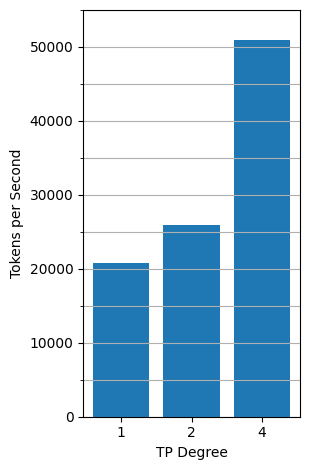

In [15]:
# DP=8 TP Tokens per Second
plt.figure(figsize=(3.2,4.8))
tps = [1, 2, 4]
thrps = []
for tp in tps:
    log = read_log(f'dp8-tp{tp}' if tp != 1 else 'dp8')
    thrps.append(np.mean(log['Tokens per second'][10:]))
# log_base_orig = read_log('base-orig')
# plt.bar([0], [np.mean(log_base_orig['Tokens per second'][10:])], color='tab:orange', label='Orignal')
plt.bar(np.arange(len(tps)), thrps, label='Ours')
plt.xticks(np.arange(len(tps)), list(map(str, tps)))
plt.yticks(np.arange(0, max(thrps)+5000, 5000), minor=True)
plt.xlabel('TP Degree')
plt.ylabel('Tokens per Second')
plt.grid(which='both', axis='y')
# plt.legend()
plt.tight_layout()
# plt.savefig('tokens_per_sec_dp8_tp.pdf')
plt.show()

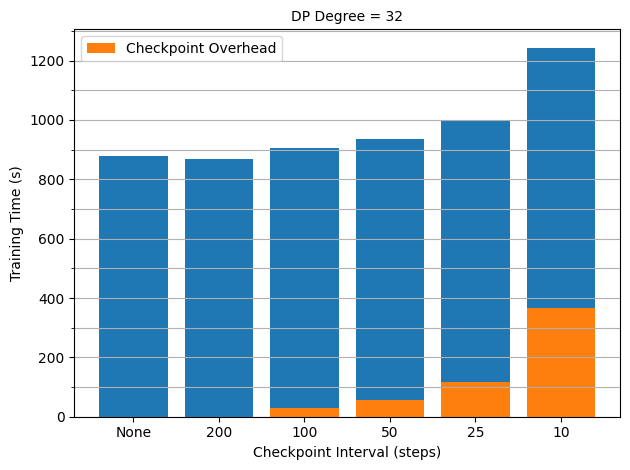

In [16]:
# Checkpoint Time
dcps = [None, 200, 100, 50, 25, 10]
ts = []
for dcp in dcps:
    log = read_log(f'dp32-dcp{dcp}-long' if dcp else 'dp32-long')
    ts.append((log['training_complete'] - log['training_start']).total_seconds())
plt.bar(np.arange(len(dcps)), ts)
plt.bar(np.arange(len(dcps)), [max(t - ts[0], 0) for t in ts], color='tab:orange', label='Checkpoint Overhead')
plt.xticks(np.arange(len(dcps)), list(map(str, dcps)))
plt.yticks(np.arange(0, max(ts)+100, 100), minor=True)
plt.xlabel('Checkpoint Interval (steps)')
plt.ylabel('Training Time (s)')
plt.grid(which='both', axis='y')
plt.legend()
plt.title('DP Degree = 32', fontsize=None)
plt.tight_layout()
plt.savefig('time_dp32_dcp.pdf')
plt.show()

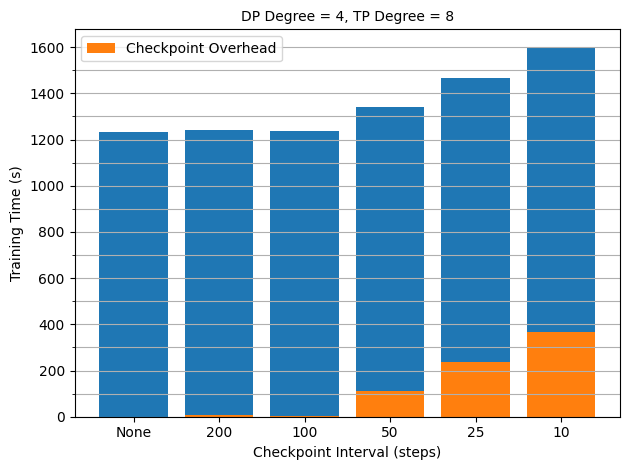

In [17]:
# Checkpoint Time
dcps = [None, 200, 100, 50, 25, 10]
ts = []
for dcp in dcps:
    log = read_log(f'dp4-tp8-dcp{dcp}-long' if dcp else 'dp4-tp8-long')
    ts.append((log['training_complete'] - log['training_start']).total_seconds())
plt.bar(np.arange(len(dcps)), ts)
plt.bar(np.arange(len(dcps)), [max(t - ts[0], 0) for t in ts], color='tab:orange', label='Checkpoint Overhead')
plt.xticks(np.arange(len(dcps)), list(map(str, dcps)))
plt.yticks(np.arange(0, max(ts)+100, 100), minor=True)
plt.xlabel('Checkpoint Interval (steps)')
plt.ylabel('Training Time (s)')
plt.grid(which='both', axis='y')
plt.legend()
plt.title('DP Degree = 4, TP Degree = 8', fontsize=None)
plt.tight_layout()
plt.savefig('time_dp4_tp8_dcp.pdf')
plt.show()

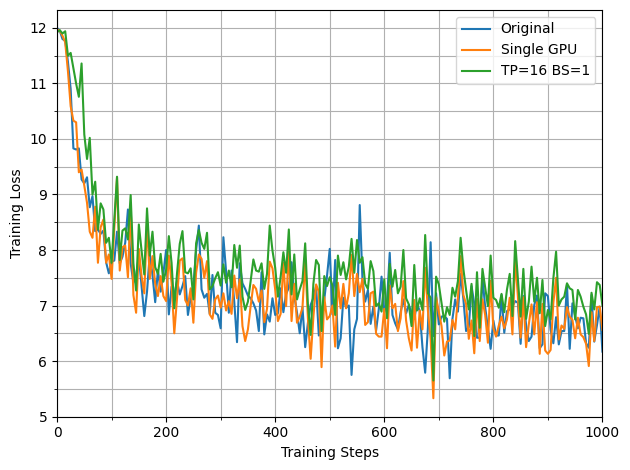

In [18]:
logs = [
    (read_log('base-orig'), 'Original'),
    (read_log('base-long'), 'Single GPU'),
    # (read_log('dp32-long'), 'DP=32'),
    # (read_log('tp16-long'), 'TP=16 BS=16'),
    (read_log('tp16-bs1-long'), 'TP=16 BS=1')
]
for log, label in logs:
    steps = log['Step']
    loss = log['Loss'] if 'Loss' in log else log['Loss (Avg)']
    plt.plot(steps, loss, label=label)
plt.xticks(np.arange(0, np.max(steps), 100), minor=True)
plt.xlim(0, 1000)
plt.yticks(np.arange(5.0, np.max(loss) + 0.5, 0.5), minor=True)
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.grid(which='both')
plt.legend()
plt.tight_layout()
plt.savefig('loss_bs1.pdf')
plt.show()

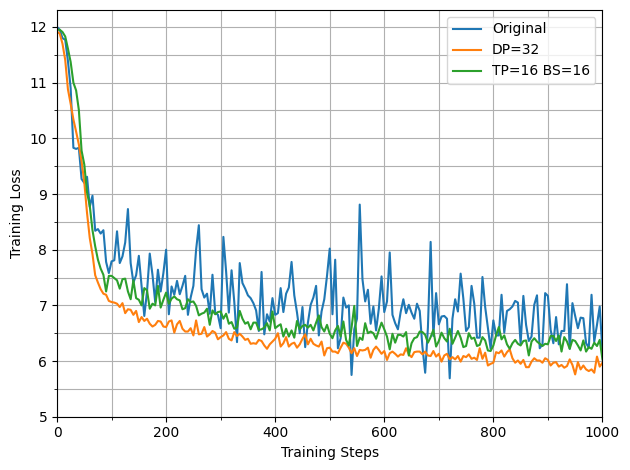

In [19]:
logs = [
    (read_log('base-orig'), 'Original'),
    # (read_log('base-long'), 'Single GPU'),
    (read_log('dp32-long'), 'DP=32'),
    (read_log('tp16-long'), 'TP=16 BS=16'),
    # (read_log('tp16-bs1-long'), 'TP=16 BS=1')
]
for log, label in logs:
    steps = log['Step']
    loss = log['Loss'] if 'Loss' in log else log['Loss (Avg)']
    plt.plot(steps, loss, label=label)
plt.xticks(np.arange(0, np.max(steps), 100), minor=True)
plt.xlim(0, 1000)
plt.yticks(np.arange(5.0, np.max(loss) + 0.5, 0.5), minor=True)
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.grid(which='both')
plt.legend()
plt.tight_layout()
plt.savefig('loss.pdf')
plt.show()

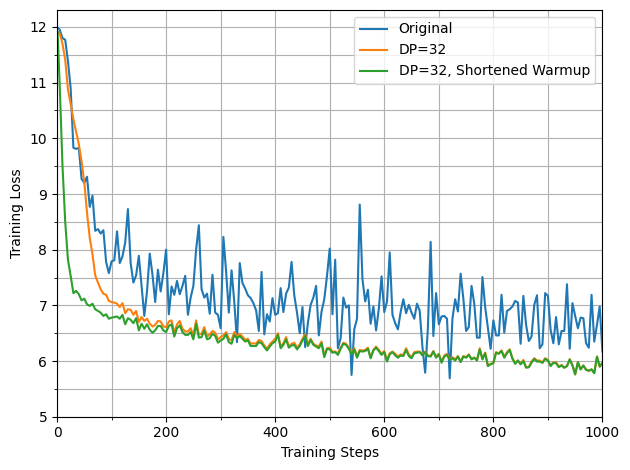

In [20]:
logs = [
    (read_log('base-orig'), 'Original', 1.0),
    (read_log('dp32-long'), 'DP=32', 5.0),
    (read_log('dp32-warmup4-long'), 'DP=32, Shortened Warmup', 5.0),
    # (read_log('dp32-warmup10-long'), 'DP=32, Quick Warmup 10, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr5-long'), 'DP=32 LR=5x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr10-long'), 'DP=32 LR=10x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr15-long'), 'DP=32 LR=15x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr20-long'), 'DP=32 LR=20x, 5x Scaled Steps', 5.0),
]
for log, label, _ in logs:
    steps = log['Step']
    loss = log['Loss'] if 'Loss' in log else log['Loss (Avg)']
    plt.plot(steps, loss, label=label)
plt.xticks(np.arange(0, np.max(steps), 100), minor=True)
plt.xlim(0, 1000)
plt.yticks(np.arange(5.0, np.max(loss) + 0.5, 0.5), minor=True)
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.grid(which='both')
plt.legend()
plt.tight_layout()
plt.savefig('loss_highlr.pdf')
plt.show()

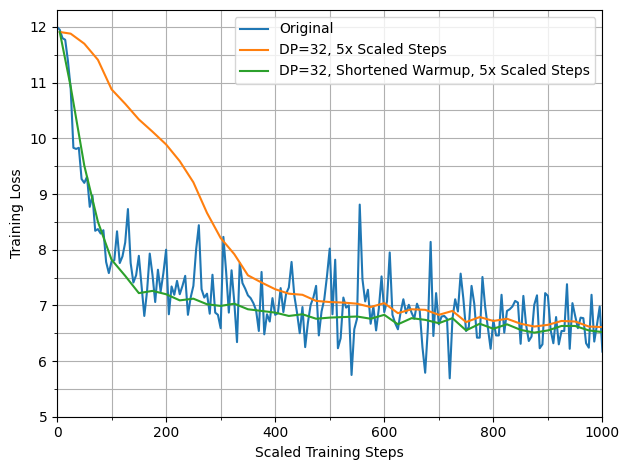

In [21]:
logs = [
    (read_log('base-orig'), 'Original', 1.0),
    (read_log('dp32-long'), 'DP=32, 5x Scaled Steps', 5.0),
    (read_log('dp32-warmup4-long'), 'DP=32, Shortened Warmup, 5x Scaled Steps', 5.0),
    # (read_log('dp32-warmup10-long'), 'DP=32, Quick Warmup 10, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr5-long'), 'DP=32 LR=5x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr10-long'), 'DP=32 LR=10x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr15-long'), 'DP=32 LR=15x, 5x Scaled Steps', 5.0),
    # (read_log('dp32-highlr20-long'), 'DP=32 LR=20x, 5x Scaled Steps', 5.0),
]
for log, label, scale in logs:
    steps = np.array(log['Step']) * scale
    loss = log['Loss'] if 'Loss' in log else log['Loss (Avg)']
    plt.plot(steps, loss, label=label)
plt.xticks(np.arange(0, np.max(steps), 100), minor=True)
plt.xlim(0, 1000)
plt.yticks(np.arange(5.0, np.max(loss) + 0.5, 0.5), minor=True)
plt.xlabel('Scaled Training Steps')
plt.ylabel('Training Loss')
plt.grid(which='both')
plt.legend()
plt.tight_layout()
plt.savefig('loss_highlr_scaled.pdf')
plt.show()